In [1]:
import copy
import os

import matplotlib.pyplot as plt

import numpy as np
from tensorflow.keras import models, layers, losses
from PIL import Image
from sklearn.model_selection import train_test_split

2023-05-02 02:12:58.502844: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-02 02:12:58.525302: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-02 02:12:58.526056: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-02 02:12:59.110274: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def load_image(path: str):
    return np.array(copy.deepcopy(Image.open(path).convert("RGB")))

In [3]:
labels = os.listdir("dataset/")

In [4]:
def prepare_dataset():
    X, Y = [], []

    for i, label in enumerate(labels):
        image_names = os.listdir("dataset/" + label)
        paths = list(map(lambda file: f"dataset/{label}/{file}", image_names))

        num = len(paths)

        X.extend(map(load_image, paths))
        Y.extend([i] * num)

    return train_test_split(np.array(X), np.array(Y), shuffle=True)

    

In [5]:
X_train, X_test, Y_train, Y_test = prepare_dataset()

/home/romain/.local/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


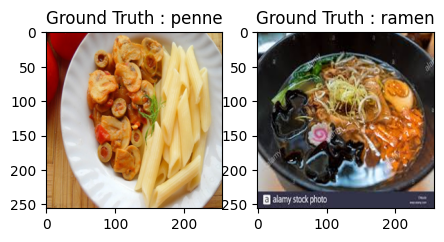

In [6]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[0])
plt.title("Ground Truth : {}".format(labels[Y_train[0]]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[0])
plt.title("Ground Truth : {}".format(labels[Y_test[0]]))

plt.show()

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(7))


In [9]:
model.compile(optimizer='adam',
              loss=losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
history = model.fit(X_train, Y_train, epochs=10, 
                    validation_data=(X_test, Y_test))

Epoch 1/10
105/105 [==============================] - 98s 933ms/step - loss: 46.7245 - accuracy: 0.1941 - val_loss: 1.9282 - val_accuracy: 0.2013
Epoch 2/10
105/105 [==============================] - 97s 929ms/step - loss: 1.7874 - accuracy: 0.2836 - val_loss: 1.9382 - val_accuracy: 0.2345
Epoch 3/10
105/105 [==============================] - 97s 920ms/step - loss: 1.5247 - accuracy: 0.4109 - val_loss: 2.1571 - val_accuracy: 0.2731
Epoch 4/10
105/105 [==============================] - 97s 924ms/step - loss: 1.2424 - accuracy: 0.5484 - val_loss: 2.6211 - val_accuracy: 0.2956
Epoch 5/10
105/105 [==============================] - 97s 924ms/step - loss: 0.9308 - accuracy: 0.6909 - val_loss: 3.2210 - val_accuracy: 0.3127
Epoch 6/10
105/105 [==============================] - 97s 924ms/step - loss: 0.5362 - accuracy: 0.8347 - val_loss: 4.2797 - val_accuracy: 0.3378
Epoch 7/10
105/105 [==============================] - 97s 926ms/step - loss: 0.5005 - accuracy: 0.8619 - val_loss: 4.3109 - val_a

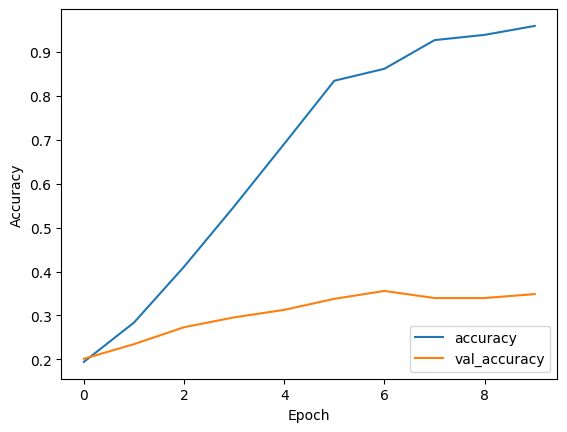

35/35 - 5s - loss: 5.5394 - accuracy: 0.3486 - 5s/epoch - 136ms/step
0.3486073613166809


In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print(test_acc)

In [ ]:
if not os.path.exists("models"):
    os.mkdir("models")

model.save("models/first_try")